# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
# Load grocery data
df = pd.read_csv('Wholesale_data.csv')

In [3]:
df.shape

(440, 8)

In [4]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
# Checking for null values
df.isnull()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
435,False,False,False,False,False,False,False,False
436,False,False,False,False,False,False,False,False
437,False,False,False,False,False,False,False,False
438,False,False,False,False,False,False,False,False


In [6]:
# Count nulls per column
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [7]:
# Summary statistics
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


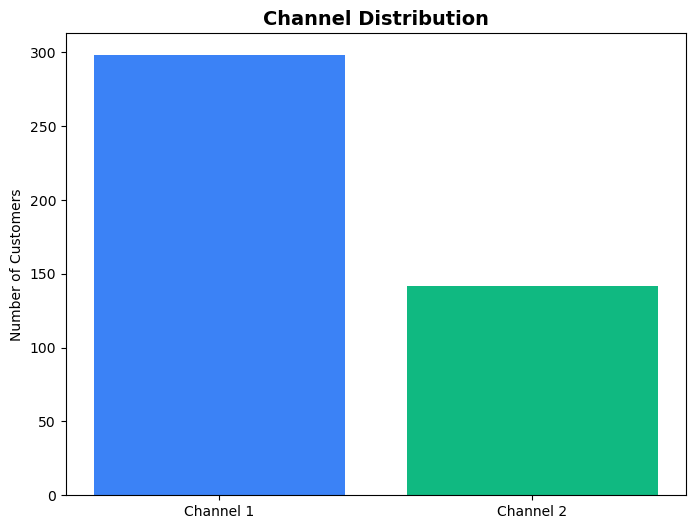

In [8]:
# Channel Distribution Chart
plt.figure(figsize=(8, 6))

channel_counts = df['Channel'].value_counts().sort_index()
channel_labels = [f'Channel {i}' for i in channel_counts.index]

plt.bar(channel_labels, channel_counts.values, color=['#3B82F6', '#10B981'])
plt.title('Channel Distribution', fontweight='bold', fontsize=14)
plt.ylabel('Number of Customers')
plt.show()


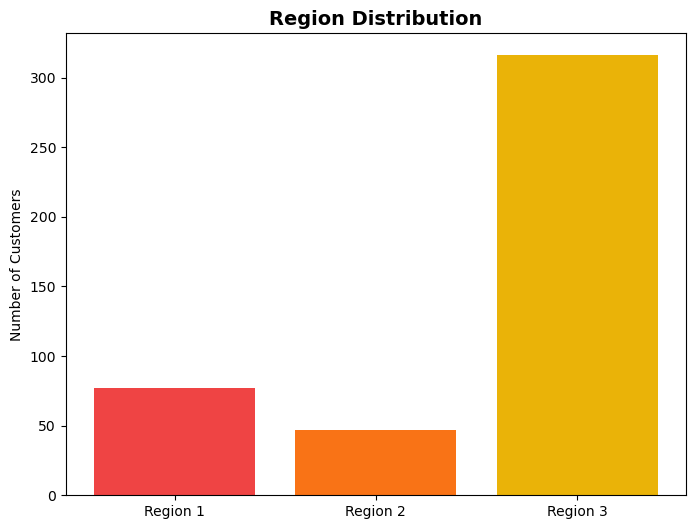

In [9]:
# Region Distribution Chart
plt.figure(figsize=(8, 6))

region_counts = df['Region'].value_counts().sort_index()
region_labels = [f'Region {i}' for i in region_counts.index]

plt.bar(region_labels, region_counts.values, color=['#EF4444', '#F97316', '#EAB308'])
plt.title('Region Distribution', fontweight='bold', fontsize=14)
plt.ylabel('Number of Customers')
plt.show()

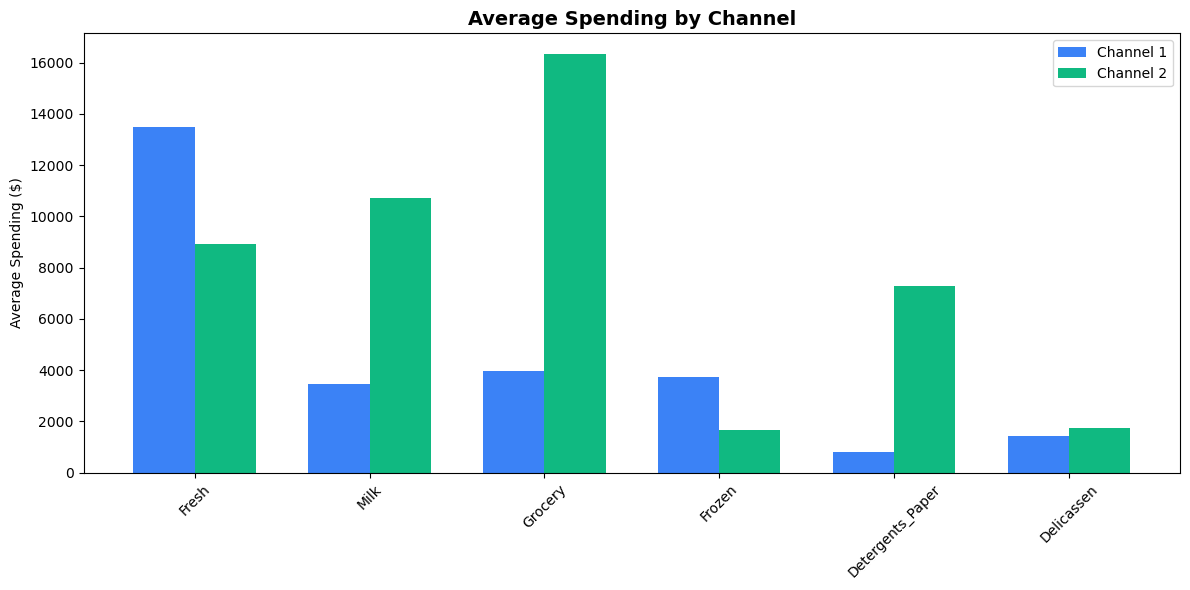

In [10]:
# Average Spending by Channel
plt.figure(figsize=(12, 6))

spending_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
channel1_avg = df[df['Channel'] == 1][spending_cols].mean()
channel2_avg = df[df['Channel'] == 2][spending_cols].mean()

x = np.arange(len(spending_cols))
width = 0.35

plt.bar(x - width/2, channel1_avg, width, label='Channel 1', color='#3B82F6')
plt.bar(x + width/2, channel2_avg, width, label='Channel 2', color='#10B981')

plt.title('Average Spending by Channel', fontweight='bold', fontsize=14)
plt.ylabel('Average Spending ($)')
plt.xticks(x, spending_cols, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

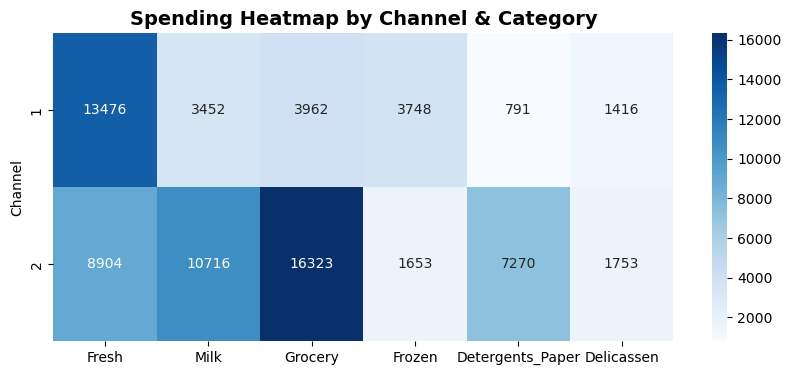

In [11]:
# Spending Heatmap by Channel & Category
plt.figure(figsize=(10, 4))

spending_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
heatmap_data = df.groupby('Channel')[spending_cols].mean()

sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='Blues')
plt.title('Spending Heatmap by Channel & Category', fontweight='bold', fontsize=14)
plt.show()

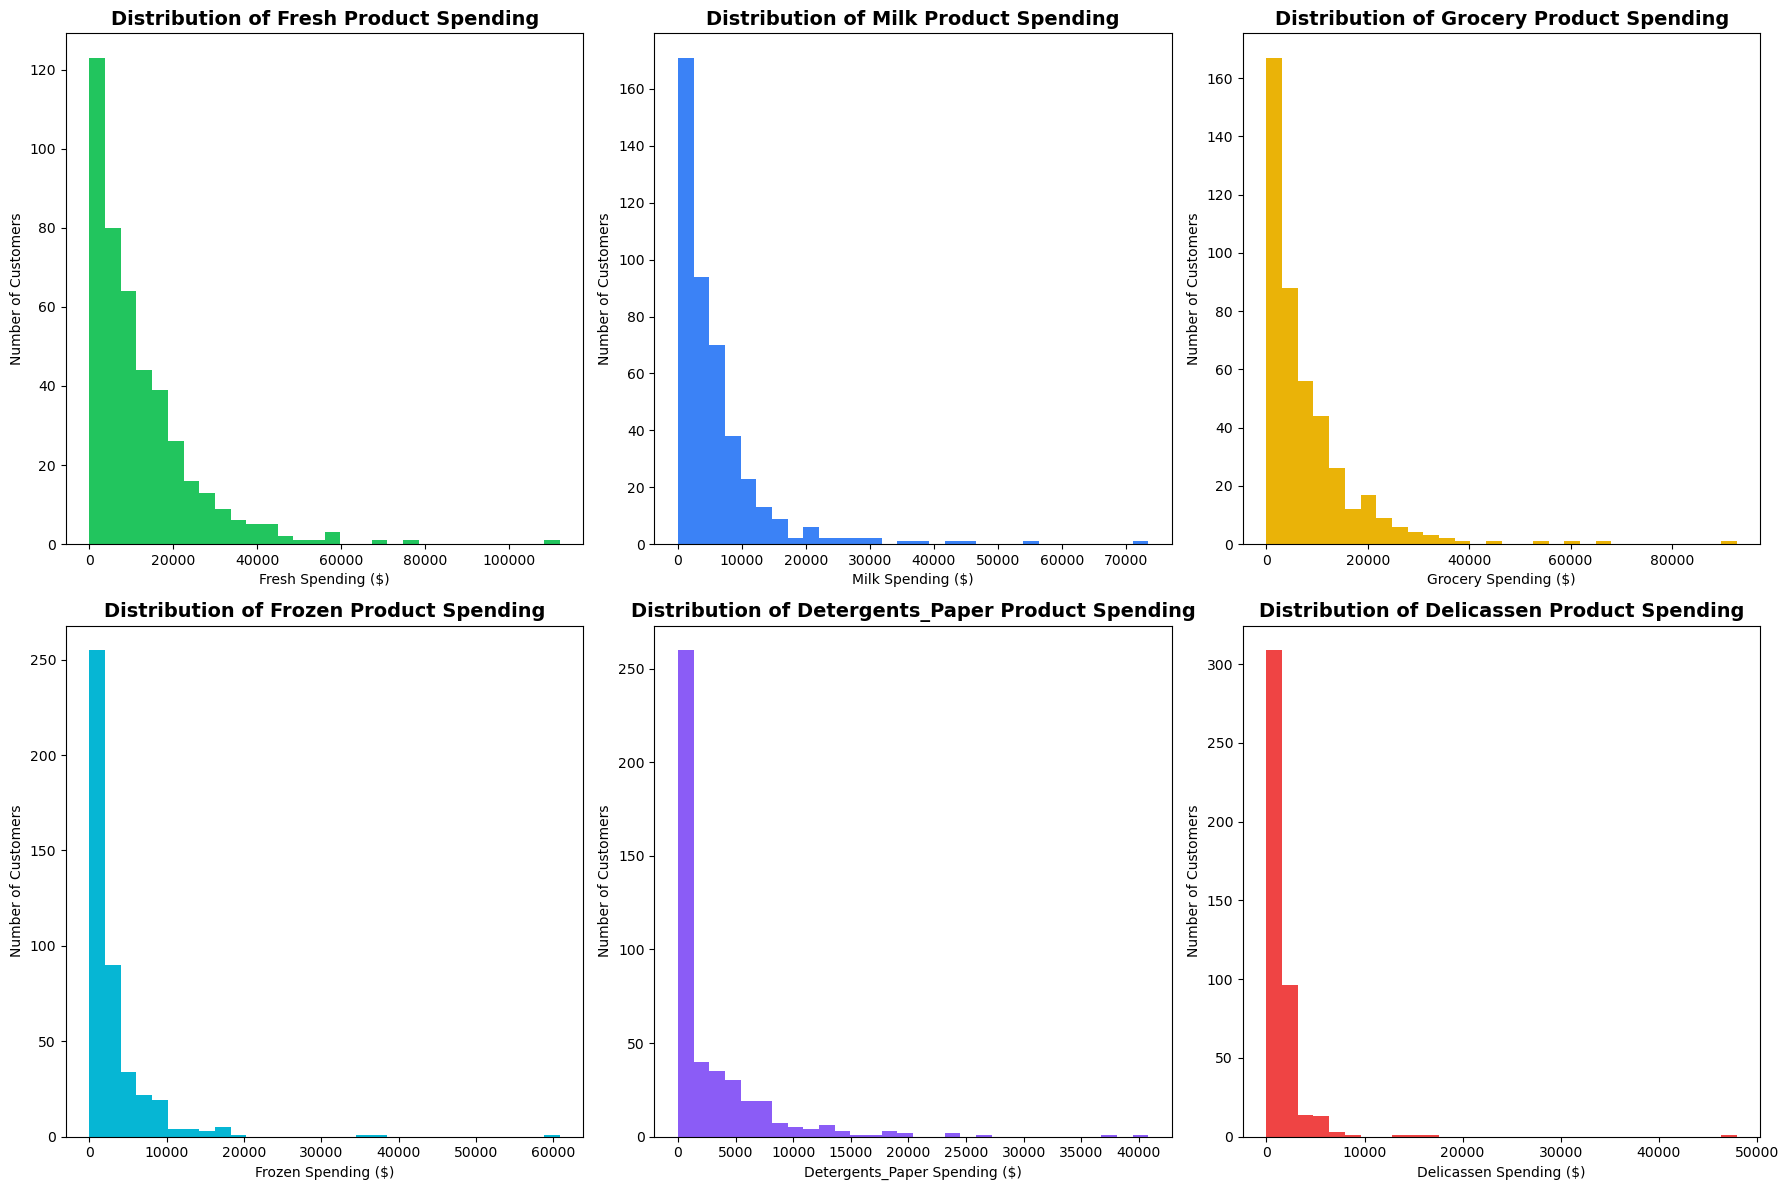

In [12]:
# Spending Distributions
plt.figure(figsize=(18, 12))

# Data and colors for each category
categories = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
colors = ['#22C55E', '#3B82F6', '#EAB308', '#06B6D4', '#8B5CF6', '#EF4444']

# Create subplots in 2x3 grid
for i, (category, color) in enumerate(zip(categories, colors)):
    plt.subplot(2, 3, i+1)
    plt.hist(df[category], bins=30, color=color)
    plt.title(f'Distribution of {category} Product Spending', fontweight='bold', fontsize=14)
    plt.xlabel(f'{category} Spending ($)')
    plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()

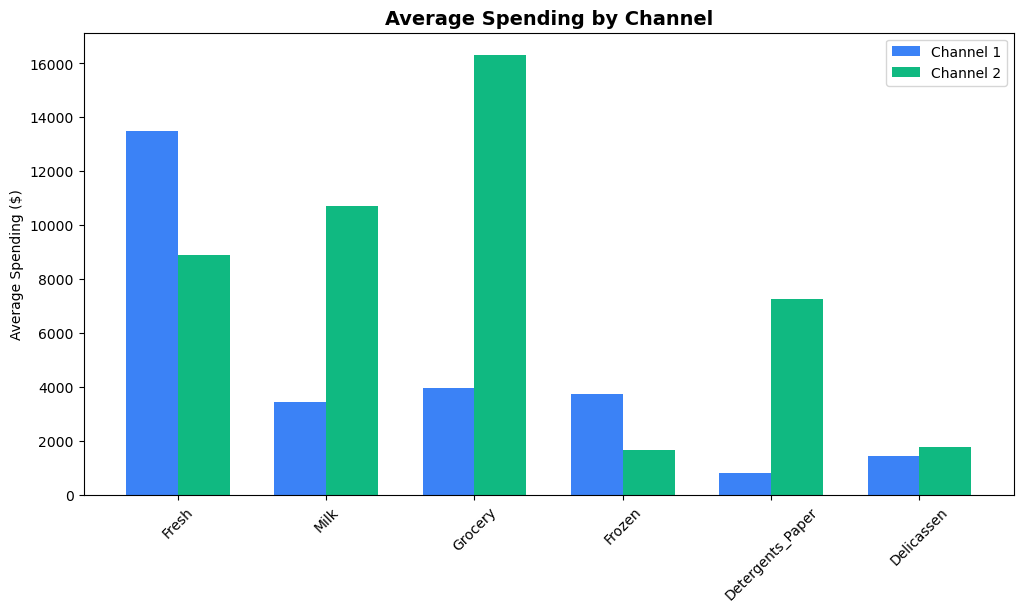

In [13]:
# Average Spending by Channel
plt.figure(figsize=(12, 6))

spending_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
channel1_avg = df[df['Channel'] == 1][spending_cols].mean()
channel2_avg = df[df['Channel'] == 2][spending_cols].mean()

x = np.arange(len(spending_cols))
width = 0.35

plt.bar(x - width/2, channel1_avg, width, label='Channel 1', color='#3B82F6')
plt.bar(x + width/2, channel2_avg, width, label='Channel 2', color='#10B981')

plt.title('Average Spending by Channel', fontweight='bold', fontsize=14)
plt.ylabel('Average Spending ($)')
plt.xticks(x, spending_cols, rotation=45)
plt.legend()
plt.show()

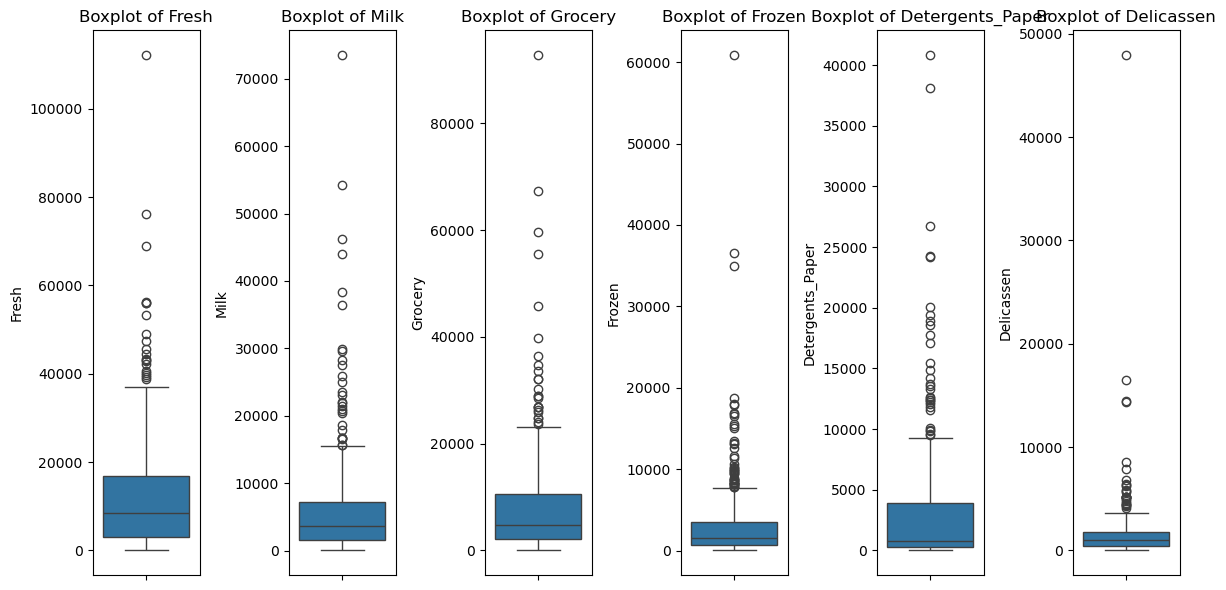

In [14]:
# Look for outliers

features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'] 
plt.figure(figsize=(12, 6))

for i, feature in enumerate(features):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

In [15]:
# Create correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

                   Channel    Region     Fresh      Milk   Grocery    Frozen  \
Channel           1.000000  0.062028 -0.169172  0.460720  0.608792 -0.202046   
Region            0.062028  1.000000  0.055287  0.032288  0.007696 -0.021044   
Fresh            -0.169172  0.055287  1.000000  0.100510 -0.011854  0.345881   
Milk              0.460720  0.032288  0.100510  1.000000  0.728335  0.123994   
Grocery           0.608792  0.007696 -0.011854  0.728335  1.000000 -0.040193   
Frozen           -0.202046 -0.021044  0.345881  0.123994 -0.040193  1.000000   
Detergents_Paper  0.636026 -0.001483 -0.101953  0.661816  0.924641 -0.131525   
Delicassen        0.056011  0.045212  0.244690  0.406368  0.205497  0.390947   

                  Detergents_Paper  Delicassen  
Channel                   0.636026    0.056011  
Region                   -0.001483    0.045212  
Fresh                    -0.101953    0.244690  
Milk                      0.661816    0.406368  
Grocery                   0.924641

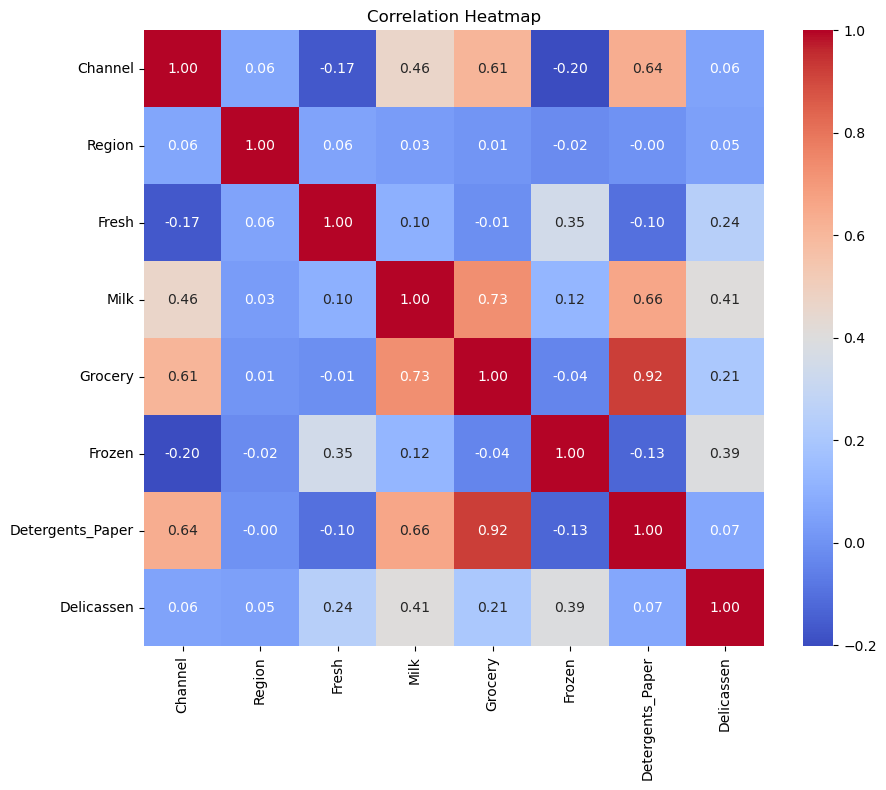

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [17]:
# Robust Scaling
scaler = RobustScaler()
spending_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Apply robust scaling to spending columns
df_scaled = df.copy()
df_scaled[spending_cols] = scaler.fit_transform(df[spending_cols])

# Check the result
print("Robust Scaled Data:")
print(df_scaled[spending_cols].head())

Robust Scaled Data:
      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0  0.301680  1.065712  0.329952 -0.466572          0.506787    0.263810
1 -0.104810  1.092934  0.565993  0.083926          0.675670    0.574008
2 -0.155802  0.915816  0.344418  0.312589          0.736512    4.871459
3  0.344850 -0.429714 -0.062862  1.734708         -0.084442    0.582507
4  1.022092  0.315171  0.287260  0.849573          0.262056    2.988314


Explained Variance by Component:
PC1: 0.444 (44.4%)
PC2: 0.302 (30.2%)
PC3: 0.150 (15.0%)
PC4: 0.057 (5.7%)
PC5: 0.039 (3.9%)
PC6: 0.007 (0.7%)


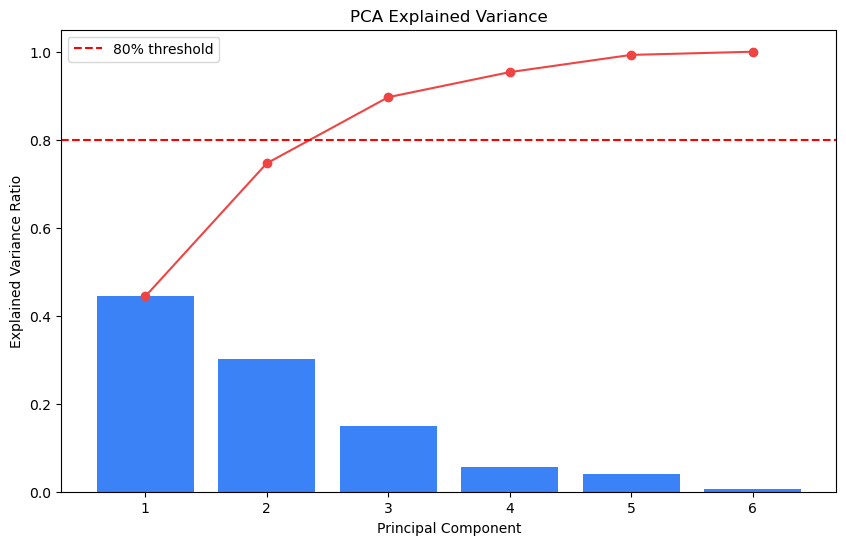


Components needed for 80% variance: 3


In [18]:
# Principal Component Analysis
pca = PCA()
pca_features = pca.fit_transform(df_scaled[spending_cols])
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Explained Variance by Component:")
for i, var in enumerate(explained_variance):
   print(f"PC{i+1}: {var:.3f} ({var*100:.1f}%)")

# PCA Visualization
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance)+1), explained_variance, color='#3B82F6')
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, 'o-', color='#EF4444')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.axhline(y=0.8, color='red', linestyle='--', label='80% threshold')
plt.legend()
plt.show()

# Find components needed for 80% variance
components_80 = np.argmax(cumulative_variance >= 0.8) + 1
print(f"\nComponents needed for 80% variance: {components_80}")

## Part II - KMeans Clustering


The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

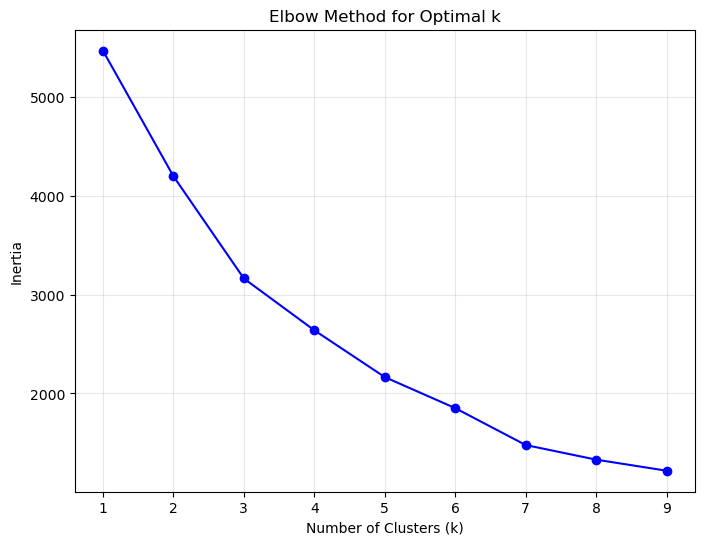

Using k = 3 clusters

Cluster Sizes:
Cluster 0: 405 customers (92.0%)
Cluster 1: 1 customers (0.2%)
Cluster 2: 34 customers (7.7%)

Cluster Characteristics (Average Spending):
           Fresh     Milk  Grocery   Frozen  Detergents_Paper  Delicassen
Cluster                                                                  
0        11913.0   4390.0   5952.0   3046.0            1843.0      1302.0
1        36847.0  43950.0  20170.0  36534.0             239.0     47943.0
2        12308.0  21426.0  31409.0   2396.0           15326.0      2811.0

Cluster vs Channel Analysis:
Channel      1     2
Cluster             
0         73.1  26.9
1        100.0   0.0
2          2.9  97.1


In [19]:
# ELBOW METHOD
k_range = range(1, 10)
inertias = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled[spending_cols])
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True, alpha=0.3)
plt.show()

# PERFORM CLUSTERING 
optimal_k = 3 
print(f"Using k = {optimal_k} clusters")

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled[spending_cols])

# ANALYZE CLUSTERS
print("\nCluster Sizes:")
cluster_sizes = df['Cluster'].value_counts().sort_index()
for cluster, size in cluster_sizes.items():
    print(f"Cluster {cluster}: {size} customers ({size/len(df)*100:.1f}%)")

print("\nCluster Characteristics (Average Spending):")
cluster_means = df.groupby('Cluster')[spending_cols].mean()
print(cluster_means.round(0))

# CLUSTER BY CHANNEL ANALYSIS
print("\nCluster vs Channel Analysis:")
channel_cluster = pd.crosstab(df['Cluster'], df['Channel'], normalize='index') * 100
print(channel_cluster.round(1))

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.


Step 2: Creating hierarchical clusters
Clustering linkage matrix created


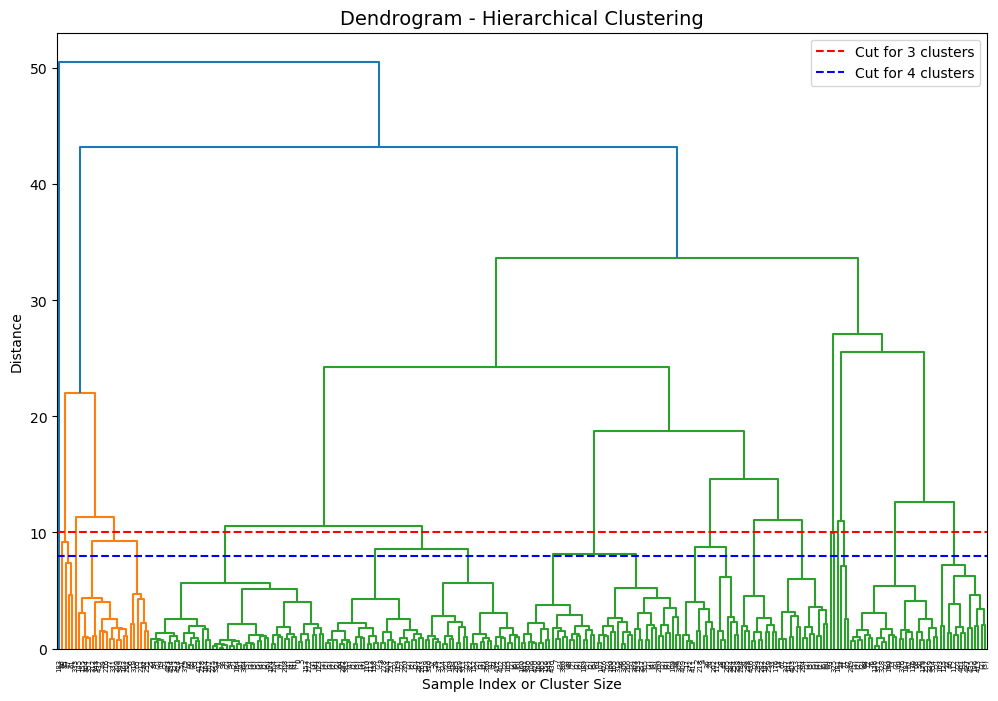

Dendrogram interpretation:
- Tall vertical lines indicate good cluster separation
- Red line creates 3 clusters
- Blue line creates 4 clusters

Step 4: Extracting clusters
Created 3 clusters

Step 5: Analyzing clusters
Cluster 1: 26 customers (5.9%)
Cluster 2: 413 customers (93.9%)
Cluster 3: 1 customers (0.2%)

Average spending by cluster:
           Fresh     Milk  Grocery   Frozen  Detergents_Paper  Delicassen
Cluster                                                                  
1        10217.0  21462.0  34220.0   1936.0           17627.0      2021.0
2        12052.0   4718.0   6268.0   3062.0            1960.0      1381.0
3        36847.0  43950.0  20170.0  36534.0             239.0     47943.0

Channel distribution by cluster:
Cluster 1: 0% Channel 1, 100% Channel 2
Cluster 2: 72% Channel 1, 28% Channel 2
Cluster 3: 100% Channel 1, 0% Channel 2

Step 6: Visualizing clusters


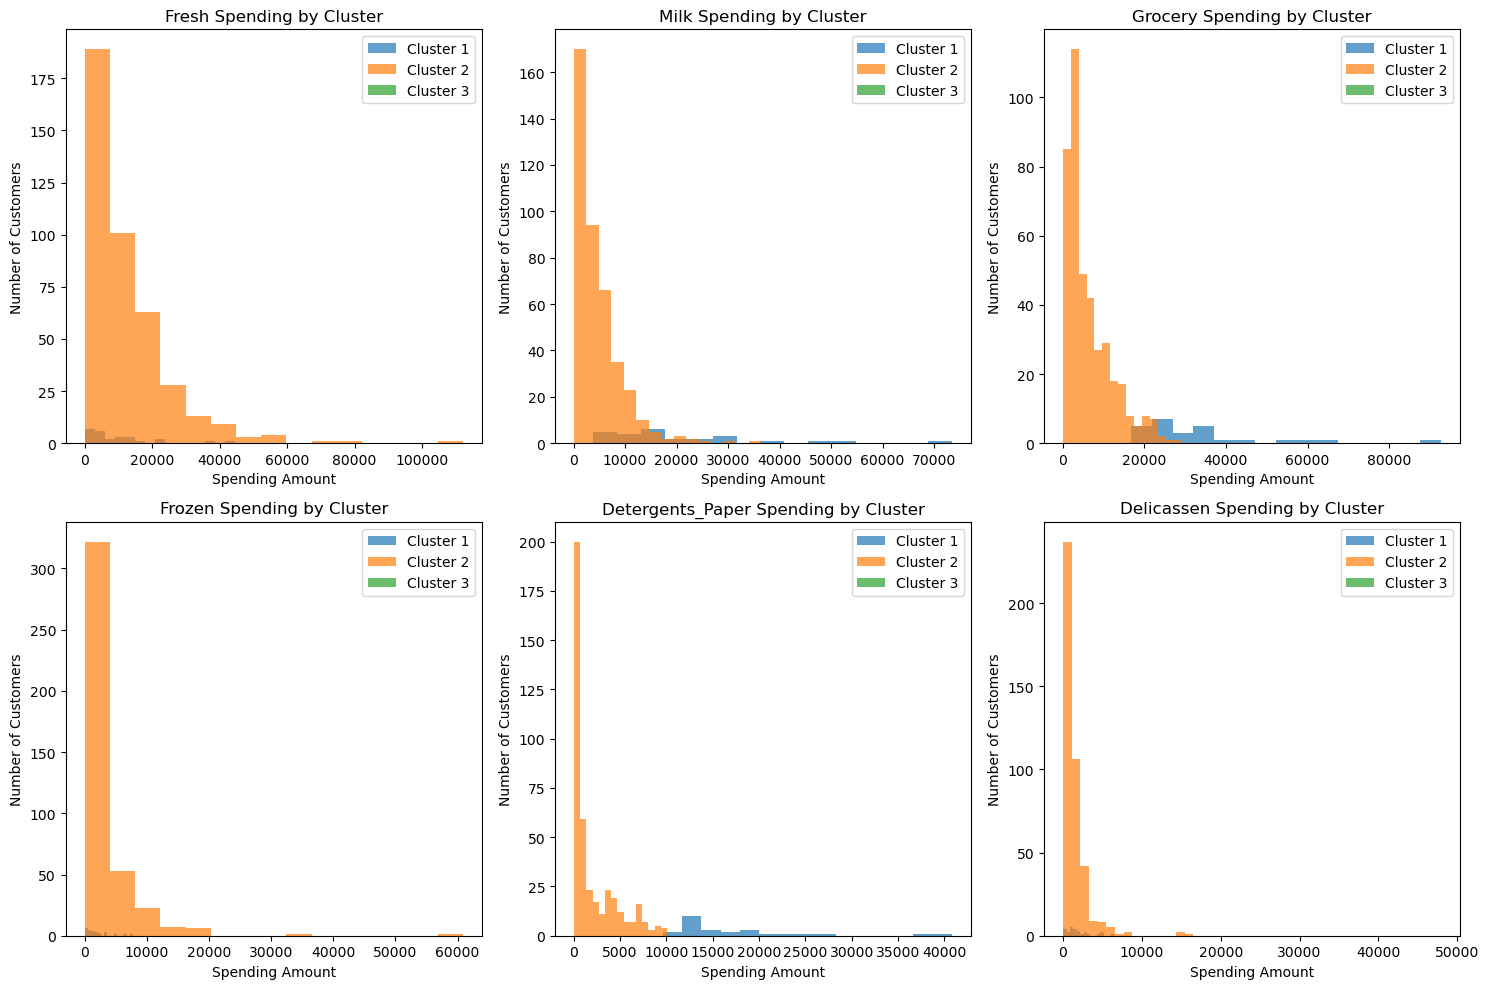


HIERARCHICAL CLUSTERING RESULTS
Customer cluster analysis:

Cluster 1:
   Size: 26 customers
   Primary spending: Grocery
   Dominant channel: Channel 2
   Customer type: Retail Stores

Cluster 2:
   Size: 413 customers
   Primary spending: Fresh
   Dominant channel: Channel 1
   Customer type: Restaurants/Hotels

Cluster 3:
   Size: 1 customers
   Primary spending: Delicassen
   Dominant channel: Channel 1
   Customer type: Restaurants/Hotels

The algorithm identified 3 distinct customer segments.


In [22]:
# Create the hierarchical clustering
print("\nStep 2: Creating hierarchical clusters")
linkage_matrix = linkage(df_scaled[spending_cols], method='ward')
print("Clustering linkage matrix created")

# Dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, 
           truncate_mode='level', 
           p=10,  
           leaf_rotation=90)

plt.title('Dendrogram - Hierarchical Clustering', fontsize=14)
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')

# Add lines to show potential cluster cuts
plt.axhline(y=10, color='red', linestyle='--', label='Cut for 3 clusters')
plt.axhline(y=8, color='blue', linestyle='--', label='Cut for 4 clusters')
plt.legend()
plt.show()

print("Dendrogram interpretation:")
print("- Tall vertical lines indicate good cluster separation")
print("- Red line creates 3 clusters")
print("- Blue line creates 4 clusters")

# Extract clusters
print("\nStep 4: Extracting clusters")
num_clusters = 3  

# Cut the dendrogram to get cluster assignments
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
df['Cluster'] = clusters

print(f"Created {num_clusters} clusters")

# Analyze clusters
print(f"\nStep 5: Analyzing clusters")

# Cluster sizes
for cluster_num in range(1, num_clusters + 1):
    count = (df['Cluster'] == cluster_num).sum()
    percentage = count / len(df) * 100
    print(f"Cluster {cluster_num}: {count} customers ({percentage:.1f}%)")

# Average spending by cluster
print(f"\nAverage spending by cluster:")
cluster_spending = df.groupby('Cluster')[spending_cols].mean()
print(cluster_spending.round(0))

# Channel distribution by cluster
print(f"\nChannel distribution by cluster:")
for cluster_num in range(1, num_clusters + 1):
    cluster_data = df[df['Cluster'] == cluster_num]
    channel1_pct = (cluster_data['Channel'] == 1).mean() * 100
    channel2_pct = (cluster_data['Channel'] == 2).mean() * 100
    print(f"Cluster {cluster_num}: {channel1_pct:.0f}% Channel 1, {channel2_pct:.0f}% Channel 2")

# Visualize results
print(f"\nStep 6: Visualizing clusters")
plt.figure(figsize=(15, 10))

# Create histogram for each spending category
for i, category in enumerate(spending_cols):
    plt.subplot(2, 3, i+1)
    
    # Plot histogram for each cluster
    for cluster_num in range(1, num_clusters + 1):
        cluster_data = df[df['Cluster'] == cluster_num][category]
        plt.hist(cluster_data, alpha=0.7, label=f'Cluster {cluster_num}', bins=15)
    
    plt.title(f'{category} Spending by Cluster')
    plt.xlabel('Spending Amount')
    plt.ylabel('Number of Customers')
    plt.legend()

plt.tight_layout()
plt.show()

# Summary
print("\n" + "="*50)
print("HIERARCHICAL CLUSTERING RESULTS")
print("="*50)
print("Customer cluster analysis:")

for cluster_num in range(1, num_clusters + 1):
    cluster_data = df[df['Cluster'] == cluster_num]
    avg_spending = cluster_data[spending_cols].mean()
    top_category = avg_spending.idxmax()
    dominant_channel = cluster_data['Channel'].mode()[0]
    
    print(f"\nCluster {cluster_num}:")
    print(f"   Size: {len(cluster_data)} customers")
    print(f"   Primary spending: {top_category}")
    print(f"   Dominant channel: Channel {dominant_channel}")
    
    if dominant_channel == 1:
        business_type = "Restaurants/Hotels"
    else:
        business_type = "Retail Stores"
    print(f"   Customer type: {business_type}")

print(f"\nThe algorithm identified {num_clusters} distinct customer segments.")

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

PCA ANALYSIS
Explained Variance by Component:
PC1: 0.444 (44.4%)
PC2: 0.302 (30.2%)
PC3: 0.150 (15.0%)
PC4: 0.057 (5.7%)
PC5: 0.039 (3.9%)
PC6: 0.007 (0.7%)


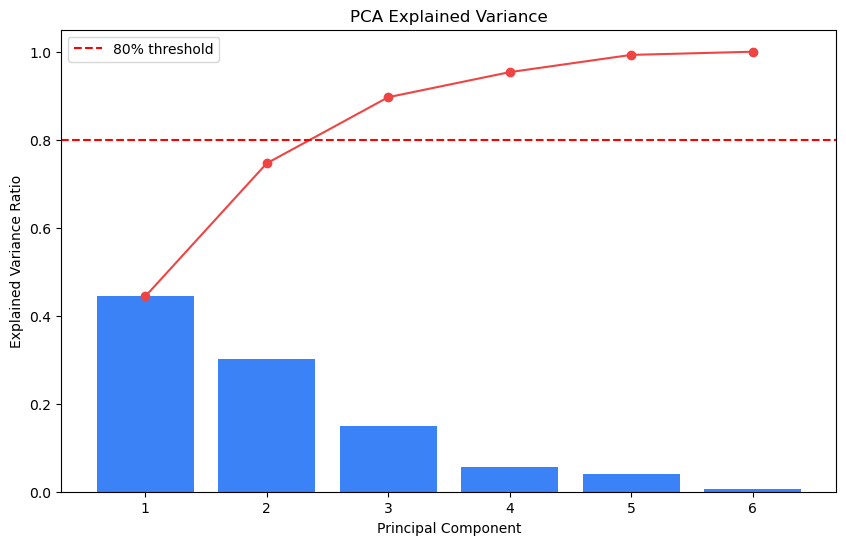


Components needed for 80% variance: 3
Dimensionality reduction: 50.0%


In [23]:
# PCA Analysis
print("PCA ANALYSIS")
print("=" * 50)

spending_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Scale data
scaler = RobustScaler()
df_scaled = df.copy()
df_scaled[spending_cols] = scaler.fit_transform(df[spending_cols])

# Perform PCA
pca = PCA()
pca_features = pca.fit_transform(df_scaled[spending_cols])
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Print results
print("Explained Variance by Component:")
for i, var in enumerate(explained_variance):
   print(f"PC{i+1}: {var:.3f} ({var*100:.1f}%)")

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance)+1), explained_variance, color='#3B82F6')
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, 'o-', color='#EF4444')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.axhline(y=0.8, color='red', linestyle='--', label='80% threshold')
plt.legend()
plt.show()

# Find components for 80% variance
components_80 = np.argmax(cumulative_variance >= 0.8) + 1
print(f"\nComponents needed for 80% variance: {components_80}")
print(f"Dimensionality reduction: {((len(spending_cols)-components_80)/len(spending_cols))*100:.1f}%")

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.